In [1]:
##AirbnbSeoul데이터 불러오기
##경로는 컴퓨터 마다 다르기 때문에 경로설정 해야함
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\Airbnb Seoul.csv")
data.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,35108,151117,Shared room,Seoul,Changjeon-dong,2,NaN,6,1.0,1.0,20,2.0,37.553134,126.925835,31:54.5
1,1,50657,151117,Private room,Seoul,Seogyo-dong,7,4.5,1,1.0,1.0,46,2.0,37.555893,126.928023,19:52.4
2,2,50809,233925,Entire home/apt,Seoul,Yeongeon-dong,8,5.0,2,0.0,1.0,151,1.0,37.576998,126.997793,55:38.2
3,3,81855,444785,Shared room,Seoul,Waryong-dong,6,4.5,6,1.0,1.0,14,1.0,37.575486,126.990546,12:35.7
4,4,81858,444785,Private room,Seoul,Gwonnong-dong,2,NaN,1,1.0,1.0,35,1.0,37.577231,126.991428,59:50.5


In [2]:
##데이터정보 확인
##얻을수 있는 정보 Feature개수, Feature종류, 데이터 수, 데이터 타입
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8519 non-null   int64  
 1   room_id               8519 non-null   int64  
 2   host_id               8519 non-null   int64  
 3   room_type             8519 non-null   object 
 4   borough               8519 non-null   object 
 5   neighborhood          8519 non-null   object 
 6   reviews               8519 non-null   int64  
 7   overall_satisfaction  3940 non-null   float64
 8   accommodates          8519 non-null   int64  
 9   bedrooms              8516 non-null   float64
 10  bathrooms             8008 non-null   float64
 11  price                 8519 non-null   int64  
 12  minstay               8295 non-null   float64
 13  latitude              8519 non-null   float64
 14  longitude             8519 non-null   float64
 15  collected            

<function matplotlib.pyplot.show(close=None, block=None)>

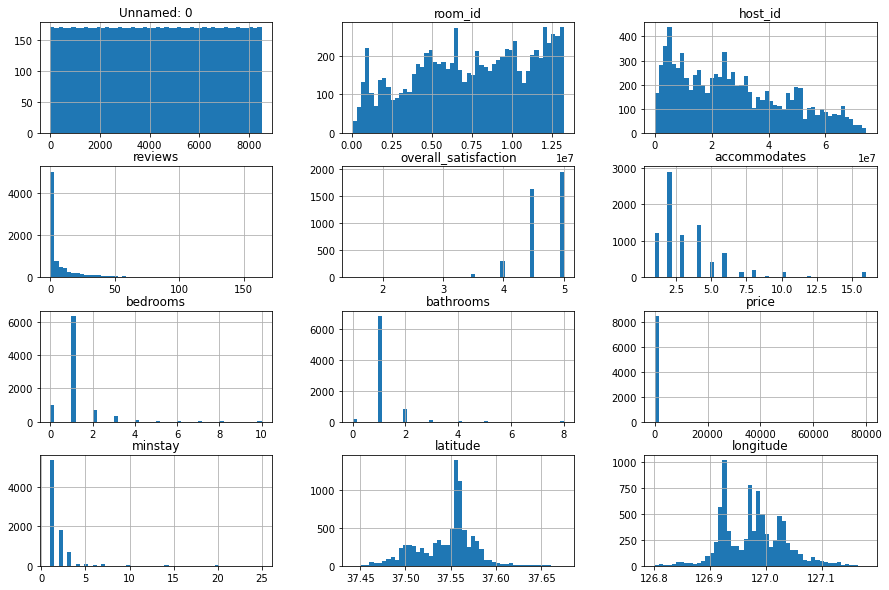

In [3]:
##차트를 사용하여 시각화
data.hist(bins=50, figsize=(15, 10))
plt.show

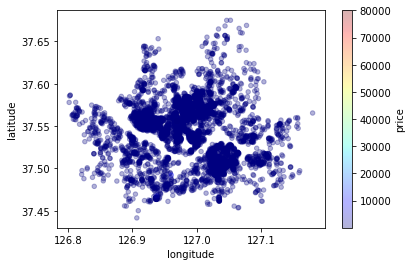

In [4]:
##plot을 찍어 위치별 가격비교
data.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.3,
                 c = 'price',cmap = plt.get_cmap('jet'),
                colorbar = True, sharex = False)

# plt.savefig('lo_la_price')

In [5]:
##가격에 대해 상관관계 분석
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
bedrooms                0.020909
accommodates            0.015779
host_id                 0.007301
room_id                 0.006309
Unnamed: 0              0.005260
bathrooms               0.004828
latitude                0.003476
longitude               0.001608
minstay                 0.000333
reviews                -0.010012
overall_satisfaction   -0.012199
Name: price, dtype: float64

<AxesSubplot:title={'center':'Listing Correlation of Features'}>

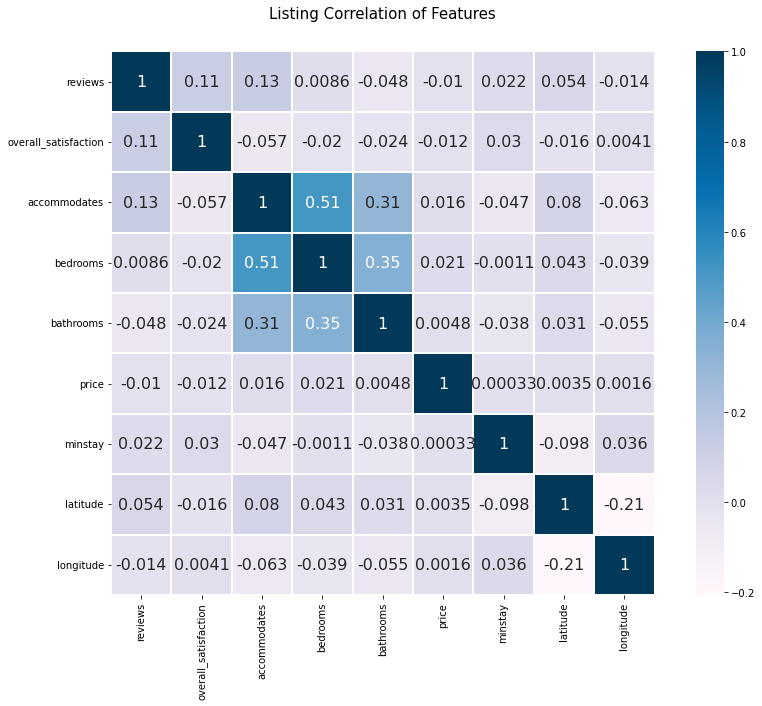

In [11]:
import seaborn as sns
heatmap_data = data[['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'latitude', 'longitude']]

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 10))
plt.title("Listing Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size" : 16})

In [6]:
##전체 상관관계 표
corr = data.corr()
corr

,Unnamed: 0,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
Unnamed: 0,1.000000,0.996544,0.665583,-0.361092,0.112320,-0.042894,-0.020708,-0.028426,0.005260,-0.051448,-0.078399,0.049628
room_id,0.996544,1.000000,0.668099,-0.360560,0.109985,-0.041170,-0.021950,-0.028341,0.006309,-0.051137,-0.080289,0.048769
host_id,0.665583,0.668099,1.000000,-0.241750,0.101397,-0.099825,-0.013532,0.012693,0.007301,-0.098953,-0.042482,0.058612
reviews,-0.361092,-0.360560,-0.241750,1.000000,0.114439,0.125517,0.008584,-0.047782,-0.010012,0.022275,0.054009,-0.014496
overall_satisfaction,0.112320,0.109985,0.101397,0.114439,1.000000,-0.057105,-0.020386,-0.024463,-0.012199,0.030402,-0.016440,0.004147
accommodates,-0.042894,-0.041170,-0.099825,0.125517,-0.057105,1.000000,0.514316,0.307274,0.015779,-0.047299,0.080219,-0.062531
bedrooms,-0.020708,-0.021950,-0.013532,0.008584,-0.020386,0.514316,1.000000,0.347357,0.020909,-0.001104,0.043269,-0.038627
bathrooms,-0.028426,-0.028341,0.012693,-0.047782,-0.024463,0.307274,0.347357,1.000000,0.004828,-0.037889,0.030962,-0.055141
price,0.005260,0.006309,0.007301,-0.010012,-0.012199,0.015779,0.020909,0.004828,1.000000,0.000333,0.003476,0.001608
minstay,-0.051448,-0.051137,-0.098953,0.022275,0.030402,-0.047299,-0.001104,-0.037889,0.000333,1.000000,-0.098437,0.036285


In [7]:
## room_type 카테고리값 확인
data["room_type"].value_counts()

Entire home/apt    3978
Private room       3539
Shared room        1002
Name: room_type, dtype: int64

In [8]:
## 데이터값 변환을 위해 OneHotEnocder 사용
## 모델에 들어갈 feature들이 숫자형식으로 들어가야 하기 때문에 apt/Private/Share room값 변환
from sklearn.preprocessing import OneHotEncoder

apt = data[['room_type']]
encoder = OneHotEncoder()
apt = encoder.fit_transform(apt)
apt.toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [9]:
##카테고리값 확인
encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [10]:
apt = pd.DataFrame(columns=encoder.categories_[0],
                   data=apt.toarray())
apt.head(10)

,Entire home/apt,Private room,Shared room
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [12]:
##Data cleansing
##non값들 0으로 바꿔주는 작업
data = data.fillna(0)
data.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,35108,151117,Shared room,Seoul,Changjeon-dong,2,0.0,6,1.0,1.0,20,2.0,37.553134,126.925835,31:54.5
1,1,50657,151117,Private room,Seoul,Seogyo-dong,7,4.5,1,1.0,1.0,46,2.0,37.555893,126.928023,19:52.4
2,2,50809,233925,Entire home/apt,Seoul,Yeongeon-dong,8,5.0,2,0.0,1.0,151,1.0,37.576998,126.997793,55:38.2
3,3,81855,444785,Shared room,Seoul,Waryong-dong,6,4.5,6,1.0,1.0,14,1.0,37.575486,126.990546,12:35.7
4,4,81858,444785,Private room,Seoul,Gwonnong-dong,2,0.0,1,1.0,1.0,35,1.0,37.577231,126.991428,59:50.5


In [13]:
##쓰지않을 feature들제거
data.drop(['host_id', 'room_id', 'Unnamed: 0', 'room_type', 'borough', 'neighborhood', 'collected'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               8519 non-null   int64  
 1   overall_satisfaction  8519 non-null   float64
 2   accommodates          8519 non-null   int64  
 3   bedrooms              8519 non-null   float64
 4   bathrooms             8519 non-null   float64
 5   price                 8519 non-null   int64  
 6   minstay               8519 non-null   float64
 7   latitude              8519 non-null   float64
 8   longitude             8519 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 599.1 KB


In [14]:
##OneHotEncoder를 통해 만든 데이터값과 기존 데이터와의 병합
data = pd.concat([data, apt], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               8519 non-null   int64  
 1   overall_satisfaction  8519 non-null   float64
 2   accommodates          8519 non-null   int64  
 3   bedrooms              8519 non-null   float64
 4   bathrooms             8519 non-null   float64
 5   price                 8519 non-null   int64  
 6   minstay               8519 non-null   float64
 7   latitude              8519 non-null   float64
 8   longitude             8519 non-null   float64
 9   Entire home/apt       8519 non-null   float64
 10  Private room          8519 non-null   float64
 11  Shared room           8519 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 798.8 KB


80000

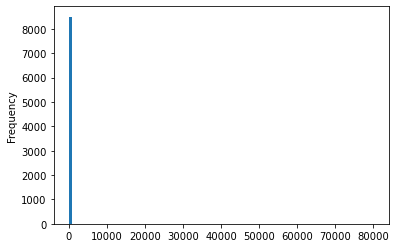

In [15]:
##가격분포확인
data['price'].plot(kind='hist', bins=100)
data['price'].max()

In [16]:
data['price'].min()

8

In [17]:
data['price'].mean()

88.63986383378331

In [18]:
##리뷰가 없거나 평점이 없는 데이터는 팔리지 않은 데이터이기 때문에 모델트레이닝에 적합하지 않다고 판단하여 제거
data2 = data[(data['reviews'] == 0) | (data['overall_satisfaction'] == 0) | (data['accommodates'] == 0)].index
data3 = data.drop(data2)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3940 entries, 1 to 8266
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               3940 non-null   int64  
 1   overall_satisfaction  3940 non-null   float64
 2   accommodates          3940 non-null   int64  
 3   bedrooms              3940 non-null   float64
 4   bathrooms             3940 non-null   float64
 5   price                 3940 non-null   int64  
 6   minstay               3940 non-null   float64
 7   latitude              3940 non-null   float64
 8   longitude             3940 non-null   float64
 9   Entire home/apt       3940 non-null   float64
 10  Private room          3940 non-null   float64
 11  Shared room           3940 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 400.2 KB


In [19]:
data3.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
1,7,4.5,1,1.0,1.0,46,2.0,37.555893,126.928023,0.0,1.0,0.0
2,8,5.0,2,0.0,1.0,151,1.0,37.576998,126.997793,1.0,0.0,0.0
3,6,4.5,6,1.0,1.0,14,1.0,37.575486,126.990546,0.0,0.0,1.0
5,4,5.0,2,1.0,1.0,36,1.0,37.577029,126.990747,0.0,1.0,0.0
7,3,4.5,2,1.0,0.0,59,2.0,37.555285,126.927202,0.0,1.0,0.0


In [20]:
##가격을 예측할것이기 때문에 price를 value로 지정
value = data3[['price']]
value.head()

,price
1,46
2,151
3,14
5,36
7,59


In [21]:
##Data cleansing을 위해 썻던 feature들 제거
data3.drop(['reviews', 'overall_satisfaction', 'price'], axis=1, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3940 entries, 1 to 8266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     3940 non-null   int64  
 1   bedrooms         3940 non-null   float64
 2   bathrooms        3940 non-null   float64
 3   minstay          3940 non-null   float64
 4   latitude         3940 non-null   float64
 5   longitude        3940 non-null   float64
 6   Entire home/apt  3940 non-null   float64
 7   Private room     3940 non-null   float64
 8   Shared room      3940 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 307.8 KB


In [22]:
#최종데이터 병합
data3 = pd.concat([data3, value], axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3940 entries, 1 to 8266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     3940 non-null   int64  
 1   bedrooms         3940 non-null   float64
 2   bathrooms        3940 non-null   float64
 3   minstay          3940 non-null   float64
 4   latitude         3940 non-null   float64
 5   longitude        3940 non-null   float64
 6   Entire home/apt  3940 non-null   float64
 7   Private room     3940 non-null   float64
 8   Shared room      3940 non-null   float64
 9   price            3940 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 338.6 KB


In [23]:
data3.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
1,1,1.0,1.0,2.0,37.555893,126.928023,0.0,1.0,0.0,46
2,2,0.0,1.0,1.0,37.576998,126.997793,1.0,0.0,0.0,151
3,6,1.0,1.0,1.0,37.575486,126.990546,0.0,0.0,1.0,14
5,2,1.0,1.0,1.0,37.577029,126.990747,0.0,1.0,0.0,36
7,2,1.0,0.0,2.0,37.555285,126.927202,0.0,1.0,0.0,59


7844

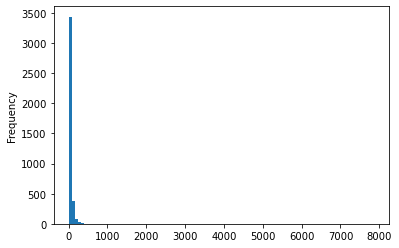

In [24]:
data3['price'].plot(kind='hist', bins=100)
data3['price'].max()

In [25]:
data3['price'].min()

10

In [26]:
data3['price'].mean()

64.3482233502538

In [27]:
from pandas import DataFrame

data_df = DataFrame(data3)
data_df

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
1,1,1.0,1.0,2.0,37.555893,126.928023,0.0,1.0,0.0,46
2,2,0.0,1.0,1.0,37.576998,126.997793,1.0,0.0,0.0,151
3,6,1.0,1.0,1.0,37.575486,126.990546,0.0,0.0,1.0,14
5,2,1.0,1.0,1.0,37.577029,126.990747,0.0,1.0,0.0,36
7,2,1.0,0.0,2.0,37.555285,126.927202,0.0,1.0,0.0,59
...,...,...,...,...,...,...,...,...,...,...
8131,3,1.0,1.0,6.0,37.536277,126.900778,1.0,0.0,0.0,48
8180,4,1.0,1.0,1.0,37.540162,126.946361,1.0,0.0,0.0,75
8193,3,0.0,1.0,1.0,37.472949,127.039993,1.0,0.0,0.0,41
8245,4,1.0,1.0,1.0,37.550713,126.914019,1.0,0.0,0.0,65


In [29]:
##데이터프레임화된 데이터들 csv파일로 변경
##여기까지 이해하시면 됩니다.

# data_df.to_csv('C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\PreProcessingSeoul.csv')

In [30]:
# Feature extraction

from sklearn.preprocessing import StandardScaler
x = data_df.drop(['price'], axis=1).values
y = data_df['price'].values

x = StandardScaler().fit_transform(x)

features = ['accommodates', 'bedrooms', 'bathroom', 'minstay', 'latitude', 'longitude', 'Entire home/apt', 'Private room', 'Shared room']
pd.DataFrame(x, columns=features).head()

,accommodates,bedrooms,bathroom,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,-1.081955,-0.123775,-0.163935,0.205168,0.336379,-0.936073,-1.297661,1.554726,-0.294782
1,-0.707063,-1.327906,-0.163935,-0.468468,1.094658,0.426837,0.770617,-0.643200,-0.294782
2,0.792508,-0.123775,-0.163935,-0.468468,1.040333,0.285271,-1.297661,-0.643200,3.392335
3,-0.707063,-0.123775,-0.163935,-0.468468,1.095771,0.289198,-1.297661,1.554726,-0.294782
4,-0.707063,-0.123775,-1.635238,0.205168,0.314535,-0.952111,-1.297661,1.554726,-0.294782


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', 'principal component3', 'principal component4', 'principal component5', 'principal component6', 'principal component7'])

In [75]:
principalDf.head()

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6
0,-2.155858,0.635908,-0.652997,0.628085,0.503090,0.450664
1,-0.092941,-0.950582,-0.929593,-0.983766,-0.607152,-0.124426
2,-0.195764,2.127677,0.917450,-2.626126,0.214749,-1.804975
3,-2.027698,0.765717,-0.434524,0.694367,-0.417387,-0.570126
4,-2.239978,0.134591,-1.169813,0.556282,0.398656,-0.464057


In [76]:
pca.explained_variance_ratio_

array([0.24535108, 0.18938862, 0.13293581, 0.1252225 , 0.10729415,
       0.08010975])

In [77]:
sum(pca.explained_variance_ratio_)

0.8803019253262656